#An Introduction to Multi-Armed Bandit

In a multi-armed bandit (MAB) problem, we are given a set of $K$ slot machines (also called arm or action) and at each time step $t = 1, 2, 3, . . .,n$ one of the $K$ arms is played. 
When arm $i \in \left\{1,...,K \right\}$ is played at time $t$, a random reward $r_{i,t}$ - which quantifies the quality of the chosen action - is drawn from some unknown distribution. Depending on the use case, the rewards can either have binary, real, or count values. 
The player only observes the payoff of the selected action and his goal is to maximize the cumulative reward through time. 
This corresponds to the well-known **exploitation** vs **exploration** trade-off in machine learning:  exploitation of empirically good actions and exploration of potentially good but less known ones.


#I. Stochastic multi-armed bandit


##I.I The stochastic case
We assume that for each arm $i \in \left\{1,...,K \right\}$, the rewards $r_{i,t}$ are i.i.d drawn from a distribution with parameter $\mu_{i}$. Depending on the type of rewards in question, we use different probabilistic models for the rewards' **likelihood** $p(r_{i,t}|\mu_{i})$.


##I.II Stochastic bandit algorithms


We denote $\mathcal{H}_{t}=(I_{s},r_{I_{s},s})_{s=1..t}$ the historical choices and the corresponding rewards till time $t$. 

In the following, we use the following notations:

- $N_{i,t}=\sum\limits_{s=1}^{t}1_{\left\{I_{t}=i\right\}}$ denotes the number of time arm $i$ has been chosen till time-step $t$.
- $S_{i,t}=\sum\limits_{s=1}^{t} 1_{\left\{I_{t}=i\right\}}r_{i,t}$ denotes the sum of reward provided by arm $i$ till time-step $t$.
- $\hat{\mu}_{i,t}=S_{i,t}/N_{i,t}$ denotes the empirical mean of arm $i$ till time-step $t$.
- $V_{i,t}=\dfrac{1}{N_{i,t}}\sum\limits_{s=1}^{t} 1_{\left\{I_{t}=i\right\}}r_{i,t}^{2}-\hat{\mu}_{i,t}^{2}$ denotes the empirical variance of arm $i$ till time-step $t$.

###I.II.a Epsilon - greedy algorithm

With probability $1-\epsilon$, choose $I_{t}=\arg\max\limits_{i \in \left\{1,...,K \right\}} \hat{\mu}_{i,t-1}$ and choose $I_{t}$ rnadomly with probability $\epsilon$.


###I.II.b UCB-Based algorithms

**Initialization**: Pull each arm of $i \in \left\{1,...,K \right\}$ once.

**Then**: For $t \in \left\{K+1,...,T \right\}$:

1. For every $i$, compute the index $s_{i,t}$;

2. Play action $I_{t}=\arg\max\limits_{i \in \left\{1,...,K \right\}} s_{i,t}$ and receive $r_{I_{t},t}$;

3. Update $N_{I_{t},t}$, $S_{I_{t},t}$, $\hat{\mu}_{I_{t},t}$ and $V_{I_{t},t}$ ;


**UCB**: 
$s_{i,t}=\hat{\mu}_{i,t-1}+\sqrt{\dfrac{2\log(t)}{N_{i,t-1}}}$

**UCBV**: 
$s_{i,t}=\hat{\mu}_{i,t-1}+\sqrt{\dfrac{2V_{i,t-1}\log(t)}{N_{i,t-1}}}+3\dfrac{\log(t)}{N_{i,t-1}}$

**UCBT**: 
$s_{i,t}=\hat{\mu}_{i,t-1}+\sqrt{\dfrac{\min(1/4,V_{i,t-1}+\sqrt{2\log{t}/N_{i,t-1}})\log(t)}{N_{i,t-1}}}$

**MOSS**: 
$s_{i,t}=\hat{\mu}_{i,t-1}+b\sqrt{\dfrac{\max\left(\frac{t}{KN_{i,t-1}},0\right)}{N_{i,t-1}}}$

**kl-UCB**: 
$s_{i,t}=\sup\left\{\mu, d(\hat{\mu}_{i,t-1},\mu)\leq \dfrac{\log(t)}{N_{i,t-1}}\right\}$


###I.II.c Thompson Sampling (TS)

**Principle of Thompson Sampling**:
The basic idea is to assume a **prior** distribution on the underlying parameters of the reward distribution of every arm, and at every time step, play an arm according to its **posterior** probability of being the best arm. The practical implementation  depends on the underlying model i.e the **likelihood**. 

For $t \in \left\{1,...,T \right\}$:

1. For every $i$, draw a sample $\tilde{\mu}_{i}$ from posterior;

2. Play action $I_{t}=\arg\max\limits_{i \in \left\{1,...,K \right\}} \tilde{\mu}_{i}$ and receive $r_{I_{t},t}$;

3. Update $N_{I_{t},t}$, $S_{I_{t},t}$, $\hat{\mu}_{I_{t},t}$ and $V_{I_{t},t}$ ;


####TS-Bernouilli
For the Bernoulli case, i.e., when the rewards are either 0 or 1, and the probability of success (reward=1) for arm $i$ is $\mu_{i}$: $r_{i,t} \sim Bernouilli(\mu_{i})$ with $\mu_{i} \in \left[0,1 \right]$. The corresponding conjugate prior is the $Beta$ distribution. We choose a $Beta(1,1)$ prior for each $\mu_{i}$, which corresponds to the uniform distribution in $\left[0,1 \right]$.

- Prior:  $\mu_{i} \sim Beta(1,1)$

- Likelihood:  $r_{i,t} \sim Bernouilli(\mu_{i})$

- Posterior:  $\mu_{i}  \sim Beta(S_{i,t}+1,N_{i,t}-S_{i,t}+1)$

####TS-Gaussian
When rewards are real number, we choose a gaussian distribution with unknown mean $\mu_{i}$ and, for simplicity variance equal to one: $r_{i,t} \sim \mathcal{N}(\mu_{i},1)$ with $\mu_{i} \in \mathbb{R}$. The corresponding conjugate prior is also a normal distribution, for which we choose a 0 mean and 1 variance.

- Prior:  $\mu_{i} \sim \mathcal{N}(0,1)$

- Likelihood:  $ r_{i,t} \sim \mathcal{N}(\mu_{i},1)$

- Posterior:  $\mu_{i}  \sim \mathcal{N}(\hat{\mu}_{i,t},\frac{1}{1+N_{i,t}})$

####TS-Poisson
We consider the count payoff case, i.e., when the rewards are in $\mathbb{N}$, and are Poisson distributed with parameter $\mu_{i}$: $\mu_{i}$: $r_{i,t} \sim Poisson(\mu_{i})$ with $\mu_{i} \in \mathbb{R}^{+*}$. The corresponding conjugate prior is the $Gamma$ distribution. We choose a $Gamma(1,1)$ prior for each $\mu_{i}$.

- Prior: $\mu_{i} \sim Gamma(1,1)$

- Likelihood:  $r_{i,t} \sim Poisson(\mu_{i})$

- Posterior: $\mu_{i} \sim Gamma(1+S_{i,t},1+t)$

##I.III Simulations

### Packages required

In [30]:
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline  

#1. Bernouilli bandit

##1.1 Data generation + Run

In [33]:
K=5 #number of arms
T=1000 #number of iteration
nbSim=10 #number of simulation before averaging
Alg={'UCB','UCBV','UCB-T','MOSS','TS','kl-UCB'}  #algorithm to run for the simulation

alpha=1 #prior
beta=1 #prior
mu = np.random.uniform(0,1,K) #random generation of parameters
mu_star=np.max(mu) #best mean, used to calculate the regret
SumReg={}
SumSqReg={}
FinalReg={}

for alg in Alg:
    SumReg[alg]=np.zeros(T)
    SumSqReg[alg]=np.zeros(T)
    FinalReg[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    data=[np.random.binomial(1,mu[i],T) for i in range(K)]
    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Reg=np.zeros(T)
                
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            for t in range(T):
                if t<K:ind=t
                else:
                    if np.random.binomial(1,1-epsilon)==1:
                        ind=np.argmax([S[i]/N[i] for i in range(K)])
                    else:
                        ind=np.random.randint(0,K)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
                
        #UCB
        if alg=='UCB':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
            
            
        #UCBV
        if alg=='UCBV':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*V[i]*np.log(t+1)/N[i])+3*np.log(t+1)/N[i] for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
        
        #UCB-Tuned
        if alg=='UCB-T':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] + np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(np.log(t+1)*min(1/4,V[i])/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
        
        #MOSS
        if alg=='MOSS':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(max(np.log((t+1)/(K*N[i])),0)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
            
        #kl-UCB
        if alg=='kl-UCB':
            precision=0.000001
            eps = 1e-15
            for t in range(T):
                if t<K:ind=t
                else:
                    V=np.zeros(K)
                    for i in range(K):
                        u=min(1, S[i]/N[i]+np.sqrt(2*np.log(t+1)/N[i]))
                        l=-1000000000
                        l = max(S[i]/N[i], l)
                        while u-l>precision:
                            m = (l+u)/2
                            x = min(max(S[i]/N[i], eps), 1-eps)
                            y = min(max(m, eps), 1-eps)
                            divKL=x*np.log(x/y) + (1-x)*np.log((1-x)/(1-y))
                            if divKL>np.log(t+1)/N[i]:
                                u = m
                            else:
                                l = m  
                        V[i]=(l+u)/2
                    ind=np.argmax([V[i] for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
                
        #TS
        if alg=='TS':
            for t in range(T):
                ind=np.argmax([np.random.beta(alpha+S[i], beta+N[i]-S[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

            
#Lower Bound#
LB=np.zeros(T)
r=0
for i in range(K):
    if mu[i]!=mu_star:
        r=r+(mu_star-mu[i])/(mu[i]*np.log(mu[i]/mu_star)+(1-mu[i])*np.log((1-mu[i])/(1-mu_star)))
for t in range(T):
    LB[t]=r*np.log(t+1)

##1.2 Regret plot

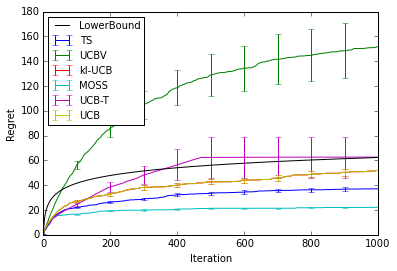

In [43]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
plt.plot(range(T),LB,label='LowerBound')
leg = plt.legend(loc=0,prop={'size':10})

##1.3 Box plot of final cumulative regret

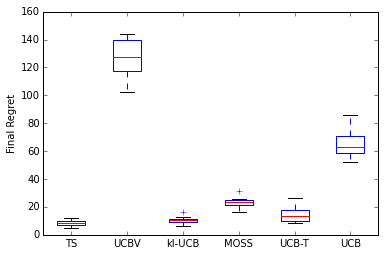

In [37]:
boxData=[]
for alg in Alg:
    boxData.append(FinalReg[alg])
ax = plt.subplot(111)
plt.ylabel('Final Regret')
plt.boxplot(boxData);
plt.xticks([i+1 for i in range(len(Alg))], [alg for alg in Alg]);

#2. Gaussian bandit

##2.1 Data generation + Run

In [38]:
K=5 #number of arms
T=1000 #number of iteration
nbSim=10 #number of simulation before averaging
Alg={'UCB','UCBV','UCB-T','MOSS','TS','kl-UCB'}  #algorithm to run for the simulation

priorMean=1
priorVar=1
likelihoodVar=1
mu = np.random.normal(priorMean,np.sqrt(priorVar),K) #random generation of parameters
mu_star=np.max(mu) #best mean, used to calculate the regret
SumReg={}
SumSqReg={}
FinalReg={}

for alg in Alg:
    SumReg[alg]=np.zeros(T)
    SumSqReg[alg]=np.zeros(T)
    FinalReg[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    data=[np.random.normal(mu[i],np.sqrt(likelihoodVar),T) for i in range(K)]
    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Reg=np.zeros(T)
                
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            for t in range(T):
                if t<K:ind=t
                else:
                    if np.random.binomial(1,1-epsilon)==1:
                        ind=np.argmax([S[i]/N[i] for i in range(K)])
                    else:
                        ind=np.random.randint(0,K)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

                
        #UCB
        if alg=='UCB':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

                                
        #UCBV
        if alg=='UCBV':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*V[i]*np.log(t+1)/N[i])+3*np.log(t+1)/N[i] for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

        
        #UCB-Tuned
        if alg=='UCB-T':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] + np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(np.log(t+1)*min(1/4,V[i])/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

                
        #MOSS
        if alg=='MOSS':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(max(np.log((t+1)/(K*N[i])),0)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

        #kl-UCB
        if alg=='kl-UCB':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
                
        #TS
        if alg=='TS':
            for t in range(T):
                ind=np.argmax([np.random.normal((priorMean/priorVar+S[i]/likelihoodVar)/(1/priorVar+N[i]/likelihoodVar), np.sqrt(1/(1/priorVar+N[i]/likelihoodVar))) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]


#Lower Bound#
LB=np.zeros(T)
r=0
for i in range(K):
    if mu[i]!=mu_star:
        r=r+(mu_star-mu[i])/((mu_star-mu[i])*(mu_star-mu[i])/2)
for t in range(T):
    LB[t]=r*np.log(t+1)

##2.2 Regret plot

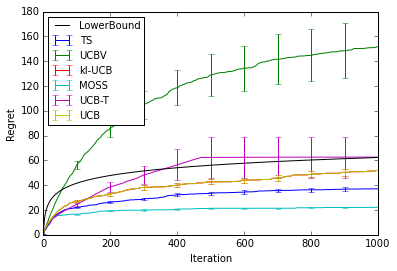

In [42]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
plt.plot(range(T),LB,label='LowerBound')
leg = plt.legend(loc=0,prop={'size':10})

##2.3 Box plot of final cumulative regret

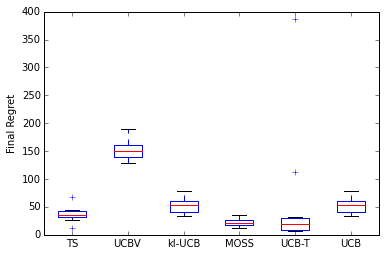

In [40]:
boxData=[]
for alg in Alg:
    boxData.append(FinalReg[alg])
ax = plt.subplot(111)
plt.ylabel('Final Regret')
plt.boxplot(boxData);
plt.xticks([i+1 for i in range(len(Alg))], [alg for alg in Alg]);

#3. Poisson bandit

##3.1 Data generation + Run

In [44]:
K=5 #number of arms
T=1000 #number of iteration
nbSim=10 #number of simulation before averaging
Alg={'UCB','UCBV','UCB-T','MOSS','TS','kl-UCB'}  #algorithm to run for the simulation

k=2 #prior shape
theta=2 #prior scale
mu = np.random.gamma(k,theta,K) #random generation of parameters
mu_star=np.max(mu) #best mean, used to calculate the regret
SumReg={}
SumSqReg={}
FinalReg={}

for alg in Alg:
    SumReg[alg]=np.zeros(T)
    SumSqReg[alg]=np.zeros(T)
    FinalReg[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    data=[np.random.poisson(mu[i],T) for i in range(K)]

    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Reg=np.zeros(T)
                
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            for t in range(T):
                if t<K:ind=t
                else:
                    if np.random.binomial(1,1-epsilon)==1:
                        ind=np.argmax([S[i]/N[i] for i in range(K)])
                    else:
                        ind=np.random.randint(0,K)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

                
        #UCB
        if alg=='UCB':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
                
                                
        #UCBV
        if alg=='UCBV':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(2*V[i]*np.log(t+1)/N[i])+3*np.log(t+1)/N[i] for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
                
                
        #UCB-Tuned
        if alg=='UCB-T':
            SSquared=np.zeros(K)
            for t in range(T):
                if t<K:ind=t
                else:
                    V=[SSquared[i]/N[i] - S[i]/N[i]*S[i]/N[i] + np.sqrt(2*np.log(t+1)/N[i]) for i in range(K)]
                    ind=np.argmax([S[i]/N[i]+np.sqrt(np.log(t+1)*min(1/4,V[i])/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                SSquared[ind]=SSquared[ind]+data[ind][t]*data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

            
            
        #MOSS
        if alg=='MOSS':
            for t in range(T):
                if t<K:ind=t
                else:
                    ind=np.argmax([S[i]/N[i]+np.sqrt(max(np.log((t+1)/(K*N[i])),0)/N[i]) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

            
                    #kl-UCB
        if alg=='kl-UCB':
            precision=0.000001
            eps = 1e-15
            for t in range(T):
                if t<K:ind=t
                else:
                    V=np.zeros(K)
                    for i in range(K):
                        u=S[i]/N[i]+np.log(t+1)/N[i]+np.sqrt((np.log(t+1)/N[i])*(np.log(t+1)/N[i])+2*(S[i]/N[i])*(np.log(t+1)/N[i]))
                        l=-1000000000
                        l = max(S[i]/N[i], l)
                        while u-l>precision:
                            m = (l+u)/2
                            x = max(S[i]/N[i], eps)
                            y = max(m, eps)
                            divKL=y-x+x*np.log(x/y)
                            if divKL>np.log(t+1)/N[i]:
                                u = m
                            else:
                                l = m  
                        V[i]=(l+u)/2
                    ind=np.argmax([V[i] for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]
            
            
        #TS
        if alg=='TS':
            for t in range(T):
                ind=np.argmax([np.random.gamma(k+S[i],theta/(theta*N[i]+1)) for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+data[ind][t]
                Reg[t]=sum([N[i]*(mu_star-mu[i]) for i in range(K)])
                SumReg[alg][t]=SumReg[alg][t]+Reg[t]
                SumSqReg[alg][t]=SumSqReg[alg][t]+Reg[t]*Reg[t]
            FinalReg[alg][sim]=Reg[-1]

#Lower Bound#
LB=np.zeros(T)
r=0
for i in range(K):
    if mu[i]!=mu_star:
        r=r+(mu_star-mu[i])/(mu_star-mu[i]+mu[i]*np.log(mu[i]/mu_star))
for t in range(T):
    LB[t]=r*np.log(t+1)

##3.2 Regret plot

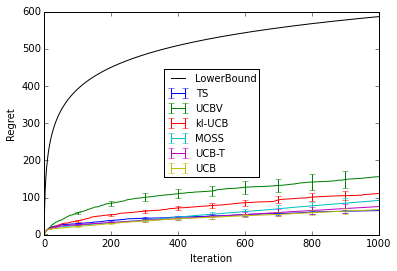

In [45]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
plt.plot(range(T),LB,label='LowerBound')
leg = plt.legend(loc=0,prop={'size':10})


##3.3 Box plot of final cumulative regret

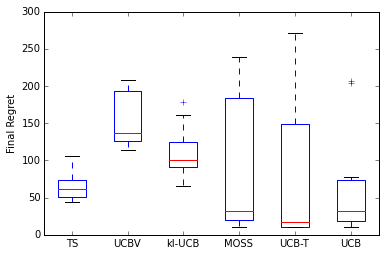

In [46]:
boxData=[]
for alg in Alg:
    boxData.append(FinalReg[alg])
ax = plt.subplot(111)
plt.ylabel('Final Regret')
plt.boxplot(boxData);
plt.xticks([i+1 for i in range(len(Alg))], [alg for alg in Alg]);

#II. Contextual multi-armed bandit

Formally, given a set $\mathcal{K}$ of $K$ arms, a contextual bandit algorithm is a sequential algorithm that proceeds as follows at each time step $t \in \left\{ 1, 2, 3,\ldots, T\right\}$:


- For all $a \in \mathcal{K}$, observe $x_{a,t}$, the features related to $a$. Each feature vector is composed of $d$ components (i.e. $x_{a,t} \in \mathbb{R}^{d}$);
- Based on previous observations and actions, choose an arm $a_{t}$ and receive the payoff $r_{a_{t},t}$. The reward reflects the quality of the chosen arm.
- Try to improve the selection strategy by considering the new observation $(x_{a_{t},t}, a_{t}, $ $r_{a_{t},t})$ in order to obtain a higher reward in future arm selections. This update only considers the reward of the chosen arm since the reward of other arms is not known.

**Hypothesis**: We suppose that the mean reward distribution $\mathbb{E}[r_{a,t}|x_{a,t}]$ of any arm $a$ at time $t$ given its context $x_{a,t}$ satisfies:
$$\mathbb{E}[r_{a,t}|x_{a,t}] = f(x_{a,t}^{T}\beta)$$
where $\beta$ is an unknown parameter of $\mathbb{R}^{d}$ and $f: \mathbb{R} \rightarrow \mathbb{R}$ is an inverse link function.

## Algorithms


###II.I Real payoffs $f(x)=x$

- **Prior**: $\beta \sim \mathcal{N}(0_{d},\lambda^{-1}I_{d})$
- **Likelihood**: $r_{a,t} \sim \mathcal{N}(x_{a,t}^{T}\beta, Id)$ 
- **Posterior**: $\beta \sim \mathcal{N}(\hat{\beta},\hat{\Sigma})$

    - $\hat{\Sigma}= \left(\lambda I_{d}+\sum\limits_{t=1}^{n-1} x_{a_{t},t}^{T}x_{a_{t},t}\right)^{-1}$
    - $\hat{\beta}=\hat{\Sigma}\left(\sum\limits_{t=1}^{n-1} r_{a_{t},t}x_{a_{t},t}\right)$


###II.II Binary payoffs $f(x)=\dfrac{1}{1+e^{-x}}$

- **Prior**: $\beta \sim \mathcal{N}(0_{d},\lambda^{-1}I_{d})$
- **Likelihood**: $p(r_{a,t}=1)=\dfrac{1}{1+e^{-x_{a,t}^{T}\beta}}$
- **Posterior**: $\beta \sim \mathcal{N}(\hat{\beta},\hat{\Sigma})$

     - $\hat{\Sigma}= \left(\lambda I_{d}+\sum\limits_{t=1}^{n-1} x_{a_{t},t}^{T}x_{a_{t},t}\right)^{-1}$
     - $\hat{\beta}=\hat{\Sigma}\left(\sum\limits_{t=1}^{n-1} r_{a_{t},t}x_{a_{t},t}\right)$

###II.III Count payoffs $f(x)=e^{x}$

- **Prior**: $\beta \sim \mathcal{N}(0_{d},\lambda^{-1}I_{d})$
- **Likelihood**: $r_{a,t} \sim Poisson(e^{x_{a,t}^{T}\beta})$ 
- **Posterior**: $\beta \sim \mathcal{N}(\hat{\beta},\hat{\Sigma})$

    - $\hat{\Sigma}= \left(\lambda I_{d}+\sum\limits_{t=1}^{n-1} r_{a_{t},t}x_{a_{t},t}^{T}x_{a_{t},t}\right)^{-1}$
    - $\hat{\beta}=\hat{\Sigma}\left(\sum\limits_{t=1}^{n-1} r_{a_{t},t}\ln(r_{a_{t},t})x_{a_{t},t}\right)$




##I.IV Simulations

### Packages required

In [12]:
import numpy as np
import matplotlib
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline  

#1. Real payoffs

##1.1 Data generation + Run

In [16]:
K=3 #number of arms
T=1000 #number of iteration
d=6 #dimension of the contexts vectors
nbSim=1 #number of simulation before averaging
Alg={'Opt','OFUL','LinUCB','TS','OBS'} #algorithm to run for the simulation

Rsquared=1.0
beta = np.random.uniform(0,1,d) #random generation of the regression parameter
#beta = np.random.normal(0,1,d) #random generation of the regression parameter
SumRwd={}
SumSqRwd={}
FinalRwd={}

for alg in Alg:
    SumRwd[alg]=np.zeros(T)
    SumSqRwd[alg]=np.zeros(T)
    FinalRwd[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    contexts=np.array([[np.random.uniform(0,1,d) for t in range(T)] for i in range(K)])
    rewards=np.array([[np.random.normal(np.dot(beta,contexts[i][t]),np.sqrt(Rsquared)) for t in range(T)] for i in range(K)])
    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Rwd=np.zeros(T)
        
        #Opt
        if alg=='Opt':
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],beta)   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                if np.random.binomial(1,1-epsilon)==1:
                    ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) for i in range(K)])
                else:
                    ind=np.random.randint(0,K)
                invA=inv(A)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #LinUCB
        if alg=='LinUCB':
            alpha=1.96
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]


        #OFUL
        if alg=='OFUL':
            delta=0.05
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                #alpha=np.sqrt(Rsquared)*np.sqrt(d*np.log((1+(t+1))/delta))+1
                alpha=np.sqrt(2/np.log(t+2))
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
        #TS
        if alg=='TS':
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                betaTilde = np.random.multivariate_normal(np.dot(invA,b),invA)
                ind=np.argmax([  np.dot(betaTilde,contexts[i][t])   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #OBS
        if alg=='OBS':
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                hatBeta=np.dot(invA,b)
                betaTilde = np.random.multivariate_normal(hatBeta,invA)
                ind=np.argmax([  max(np.dot(hatBeta,contexts[i][t]),np.dot(betaTilde,contexts[i][t]))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.dot(beta,contexts[ind][t])
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]

##1.2 Regret plot

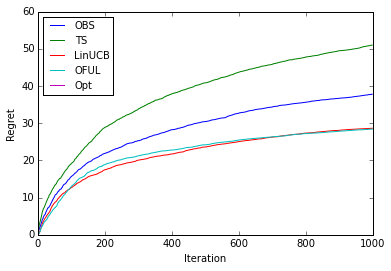

In [50]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    #plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
    plt.plot((SumRwd['Opt']-SumRwd[alg])/nbSim,label=alg)
leg = plt.legend(loc=0,prop={'size':10})

#2. Binary payoffs

##2.1 Data generation + Run

In [19]:
from scipy.stats import norm
K=3 #number of arms
T=300 #number of iteration
d=3 #dimension of the contexts vectors
nbSim=1 #number of simulation before averaging
Alg={'Opt','OFUL','LinUCB','TS-Prob'} #algorithm to run for the simulation

#beta = np.random.uniform(0,1,d) #random generation of the regression parameter
beta = np.random.normal(0,1,d) #random generation of the regression parameter
SumRwd={}
SumSqRwd={}
FinalRwd={}

for alg in Alg:
    SumRwd[alg]=np.zeros(T)
    SumSqRwd[alg]=np.zeros(T)
    FinalRwd[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    contexts=np.array([[np.random.uniform(0,1,d) for t in range(T)] for i in range(K)])
    rewards=np.array([[2*np.random.binomial(1,1/(1+np.exp(-np.dot(beta,contexts[i][t]))))-1 for t in range(T)] for i in range(K)])
    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Rwd=np.zeros(T)
        
        #Opt
        if alg=='Opt':
            for t in range(T):
                ind=np.argmax([np.dot(contexts[i][t],beta)   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                Rwd[t]=Rwd[t-1]+1/(1+np.exp(-np.dot(beta,contexts[ind][t])))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                if np.random.binomial(1,1-epsilon)==1:
                    ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) for i in range(K)])
                else:
                    ind=np.random.randint(0,K)
                invA=inv(A)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+1/(1+np.exp(-np.dot(beta,contexts[ind][t])))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #LinUCB
        if alg=='LinUCB':
            alpha=1.96
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+1/(1+np.exp(-np.dot(beta,contexts[ind][t])))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            print(beta)
            print(np.dot(inv(A),b))

        #OFUL
        if alg=='OFUL':
            delta=0.05
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                #alpha=np.sqrt(Rsquared)*np.sqrt(d*np.log((1+(t+1))/delta))+1
                alpha=np.sqrt(2/np.log(t+2))
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+1/(1+np.exp(-np.dot(beta,contexts[ind][t])))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
        #TS
        if alg=='TS-Prob':
            mu=np.zeros(d)
            Sigma=np.eye(d)
            for t in range(T):
                betaTilde = np.random.multivariate_normal(mu,0.2*Sigma)
                ind=np.argmax([np.dot(betaTilde,contexts[i][t])   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                Rwd[t]=Rwd[t-1]+1/(1+np.exp(-np.dot(beta,contexts[ind][t])))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
                #next caclc
                x=contexts[ind][t]
                y=rewards[ind][t]
                q=np.sqrt(np.dot(x,np.dot(Sigma,x))+1)
                z=y*np.dot(x,mu)/q
                Ncdf=norm.pdf(z)
                Phi=norm.cdf(z)
                mu=mu+y/q*Ncdf/Phi*np.dot(Sigma,x)
                Sigma=Sigma-1/(q*q)*Ncdf/Phi*(Ncdf/Phi+z)*np.outer(np.dot(Sigma,x),np.dot(Sigma,x))
            FinalRwd[alg][sim]=Rwd[-1]
            print(mu)

[-0.72312441 -0.58678775  0.29308438]
[-0.29720908 -0.37294752  0.17015596]
[-0.35260397 -0.64659086  0.18415035]


##2.2 Regret plot

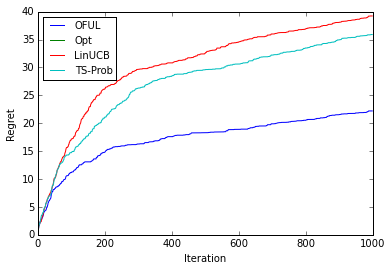

In [3]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    #plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
    plt.plot((SumRwd['Opt']-SumRwd[alg])/nbSim,label=alg)
leg = plt.legend(loc=0,prop={'size':10})

#3. Count payoffs

##3.1 Data generation + Run

In [58]:
from scipy.stats import norm
K=10 #number of arms
T=1000 #number of iteration
d=10 #dimension of the contexts vectors
nbSim=10 #number of simulation before averaging
Alg={'Opt','OFUL','LinUCB','PoissUCB','TS','OBS'} #algorithm to run for the simulation

beta = np.random.uniform(0,1,d) #random generation of the regression parameter
#beta = np.random.normal(0,1,d) #random generation of the regression parameter
SumRwd={}
SumSqRwd={}
FinalRwd={}

for alg in Alg:
    SumRwd[alg]=np.zeros(T)
    SumSqRwd[alg]=np.zeros(T)
    FinalRwd[alg]=np.zeros(nbSim)
    
#loop for each simulation
for sim in range(nbSim):
    #dataset generation
    contexts=np.array([[np.random.uniform(0,1,d) for t in range(T)] for i in range(K)])
    rewards=np.array([[np.random.poisson(np.exp(np.dot(beta,contexts[i][t]))) for t in range(T)] for i in range(K)])
    for alg in Alg:
        #initialize arms parameters
        N=np.zeros(K)
        S=np.zeros(K)
        Rwd=np.zeros(T)
        
        #Opt
        if alg=='Opt':
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],beta)   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
        #Epsilon-Greedy
        if alg=='EpsilonGreedy':
            epsilon=0.1
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                if np.random.binomial(1,1-epsilon)==1:
                    ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) for i in range(K)])
                else:
                    ind=np.random.randint(0,K)
                invA=inv(A)
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #LinUCB
        if alg=='LinUCB':
            alpha=1.96
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]

        #OFUL
        if alg=='OFUL':
            delta=0.05
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                #alpha=np.sqrt(Rsquared)*np.sqrt(d*np.log((1+(t+1))/delta))+1
                alpha=np.sqrt(2/np.log(t+2))
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #LinUCB
        if alg=='PoissUCB':
            alpha=1.96
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                ind=np.argmax([np.dot(contexts[i][t],np.dot(invA,b)) +alpha*np.sqrt(np.dot(contexts[i][t],np.dot(invA,contexts[i][t])))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+rewards[ind][t]*np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*np.log(1+rewards[ind][t])*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #TS
        if alg=='TS':
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                betaTilde = np.random.multivariate_normal(np.dot(invA,b),invA)
                ind=np.argmax([  np.dot(betaTilde,contexts[i][t])   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+rewards[ind][t]*np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*np.log(1+rewards[ind][t])*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]
            
            
        #OBS
        if alg=='OBS':
            b = np.zeros(d)
            A = np.identity(d)
            for t in range(T):
                invA=inv(A)
                hatBeta=np.dot(invA,b)
                betaTilde = np.random.multivariate_normal(hatBeta,invA)
                ind=np.argmax([  max(np.dot(hatBeta,contexts[i][t]),np.dot(betaTilde,contexts[i][t]))   for i in range(K)])
                N[ind]=N[ind]+1
                S[ind]=S[ind]+rewards[ind][t]
                A=A+rewards[ind][t]*np.outer(contexts[ind][t],contexts[ind][t])
                b=b+rewards[ind][t]*np.log(1+rewards[ind][t])*contexts[ind][t]
                Rwd[t]=Rwd[t-1]+np.exp(np.dot(beta,contexts[ind][t]))
                SumRwd[alg][t]=SumRwd[alg][t]+Rwd[t]
                SumSqRwd[alg][t]=SumSqRwd[alg][t]+Rwd[t]*Rwd[t]
            FinalRwd[alg][sim]=Rwd[-1]

##3.2 Regret plot

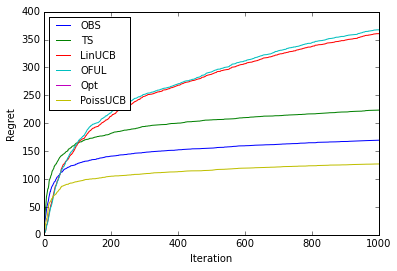

In [59]:
ax = plt.subplot(111)
plt.xlabel('Iteration')
plt.ylabel('Regret')
#ax.set_xscale("log", nonposx='clip')
a=T/10
for alg in Alg:
    #plt.errorbar(range(T),SumReg[alg]/nbSim,yerr=((SumSqReg[alg]-SumReg[alg]*SumReg[alg]/(T-1))/T)/nbSim,label=alg, markevery=a, errorevery=a)
    plt.plot((SumRwd['Opt']-SumRwd[alg])/nbSim,label=alg)
leg = plt.legend(loc=0,prop={'size':10})